<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Library-Imports" data-toc-modified-id="Library-Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Library Imports</a></span></li><li><span><a href="#Loading-Data" data-toc-modified-id="Loading-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Loading Data</a></span></li><li><span><a href="#Pre-processing" data-toc-modified-id="Pre-processing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Pre-processing</a></span></li><li><span><a href="#feature-selection" data-toc-modified-id="feature-selection-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>feature selection</a></span></li><li><span><a href="#applying-algorithms" data-toc-modified-id="applying-algorithms-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>applying algorithms</a></span><ul class="toc-item"><li><span><a href="#KMeans" data-toc-modified-id="KMeans-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>KMeans</a></span></li></ul></li></ul></div>

# Library Imports

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Loading Data

In [26]:
data = pd.read_csv('Datasets/creditcard.csv')
data.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [27]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# Pre-processing

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [29]:
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [30]:
data.dropna(axis = 0, how ='any',inplace=True) 

In [31]:
data.drop(columns="CUST_ID",inplace=True, axis=1)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8636 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8636 non-null   float64
 1   BALANCE_FREQUENCY                 8636 non-null   float64
 2   PURCHASES                         8636 non-null   float64
 3   ONEOFF_PURCHASES                  8636 non-null   float64
 4   INSTALLMENTS_PURCHASES            8636 non-null   float64
 5   CASH_ADVANCE                      8636 non-null   float64
 6   PURCHASES_FREQUENCY               8636 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8636 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8636 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8636 non-null   float64
 10  CASH_ADVANCE_TRX                  8636 non-null   int64  
 11  PURCHASES_TRX                     8636 non-null   int64  
 12  CREDIT

In [33]:
data.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [34]:
features =['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE']

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[features] = scaler.fit_transform(data[features])
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.744625,-0.370047,-0.429184,-0.359160,-0.354826,-0.468655,-0.820769,-0.686280,-0.717179,-0.681953,-0.479437,-0.517623,-0.962575,-0.543942,-0.305508,-0.537727,0.355181
1,0.764152,0.067679,-0.473208,-0.359160,-0.458839,2.568556,-1.236139,-0.686280,-0.926522,0.557022,0.099258,-0.597054,0.677204,0.796852,0.087689,0.212380,0.355181
2,0.426602,0.505405,-0.116413,0.099909,-0.458839,-0.468655,1.256077,2.646651,-0.926522,-0.681953,-0.479437,-0.120467,0.813852,-0.399503,-0.099906,-0.537727,0.355181
4,-0.373910,0.505405,-0.465825,-0.349660,-0.458839,-0.468655,-1.028455,-0.408536,-0.926522,-0.681953,-0.479437,-0.557339,-0.907916,-0.380165,-0.261131,-0.537727,0.355181
5,0.099551,0.505405,0.142062,-0.359160,0.994815,-0.468655,0.425339,-0.686280,0.538882,-0.681953,-0.479437,-0.279329,-0.743938,-0.132119,0.650363,-0.537727,0.355181


In [53]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8636.0,0.000000e+00,1.000058,-0.764144,-0.693469,-0.326598,0.240507,8.323708
BALANCE_FREQUENCY,8636.0,-3.422716e-16,1.000058,-4.309583,0.067679,0.505405,0.505405,0.505405
PURCHASES,8636.0,1.151876e-17,1.000058,-0.473208,-0.453195,-0.299970,0.055629,22.157141
ONEOFF_PURCHASES,8636.0,-3.291073e-17,1.000058,-0.359160,-0.359160,-0.332444,-0.003445,23.842835
INSTALLMENTS_PURCHASES,8636.0,-2.797412e-17,1.000058,-0.458839,-0.458839,-0.355496,0.069019,24.072555
CASH_ADVANCE,8636.0,-4.278395e-17,1.000058,-0.468655,-0.468655,-0.468655,0.065152,21.751881
PURCHASES_FREQUENCY,8636.0,6.582147e-18,1.000058,-1.236139,-1.028455,0.009969,1.048393,1.256077
ONEOFF_PURCHASES_FREQUENCY,8636.0,-3.291073e-18,1.000058,-0.686280,-0.686280,-0.408536,0.424696,2.646651
PURCHASES_INSTALLMENTS_FREQUENCY,8636.0,8.227683e-18,1.000058,-0.926522,-0.926522,-0.507834,0.957570,1.585600
CASH_ADVANCE_FREQUENCY,8636.0,2.468305e-17,1.000058,-0.681953,-0.681953,-0.681953,0.557022,6.751896


<AxesSubplot: >

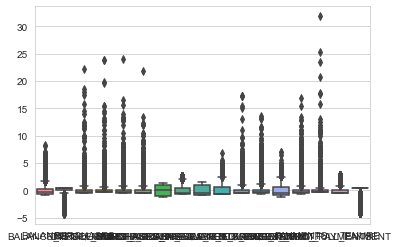

In [71]:
sns.boxplot(data=data)

# feature selection

In [54]:
from sklearn.feature_selection import VarianceThreshold
var_thres = VarianceThreshold(threshold=0)
var_thres.fit(data)

VarianceThreshold(threshold=0)

In [55]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [57]:
len(data.columns[var_thres.get_support()])

17

<AxesSubplot: >

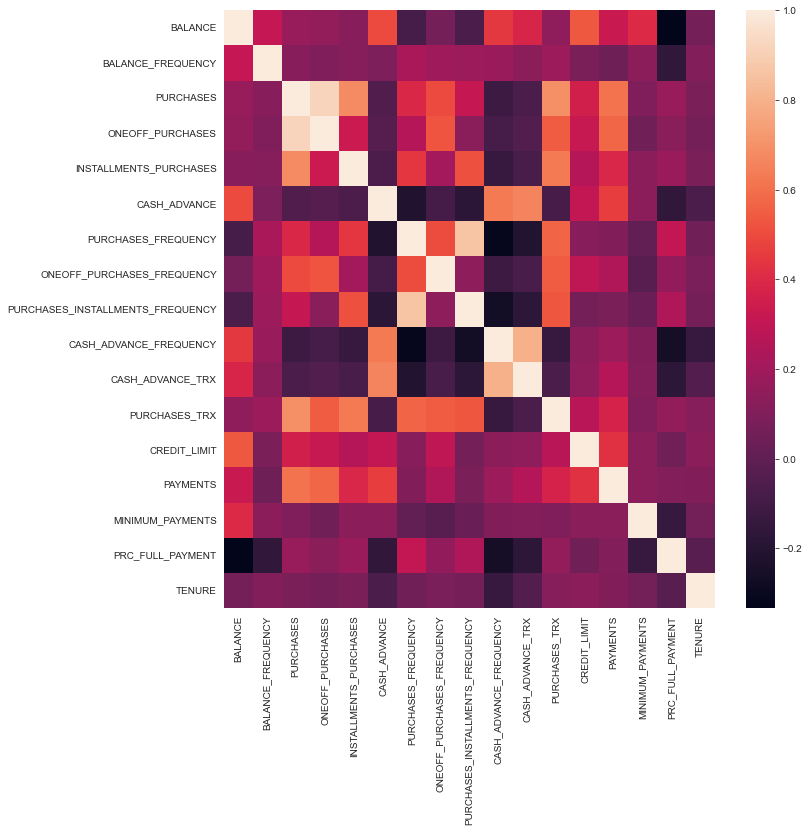

In [58]:
# Using Pearson Correlation
corrmat = data.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11,11)
sns.heatmap(corrmat)

In [60]:
corr_matrix = data.corr()
len(corr_matrix.columns)

17

In [61]:
# with following function can select highly correlated features
# it will remove first feature that is correlated with anything other feature
def correlation(dataset, threshold):
    col_corr = set()  # Set of all names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [74]:
corr_features = correlation(data, 0.5)
len(set(corr_features))

9

In [36]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(data)

PCA(n_components=2)

In [37]:
data.shape

(8636, 17)

In [38]:
x_pca = pca.transform(data)
x_pca.shape

(8636, 2)

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not        BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    -0.744625          -0.370047  -0.429184         -0.359160   
1     0.764152           0.067679  -0.473208         -0.359160   
2     0.426602           0.505405  -0.116413          0.099909   
4    -0.373910           0.505405  -0.465825         -0.349660   
5     0.099551           0.505405   0.142062         -0.359160   
...        ...                ...        ...               ...   
8943 -0.761342          -1.902089  -0.463563         -0.346751   
8945 -0.750546           0.505405  -0.338865         -0.359160   
8947 -0.752977          -0.297095  -0.406572         -0.359160   
8948 -0.757721          -0.297095  -0.473208         -0.359160   
8949 -0.586278          -1.099590   0.031295          0.289957   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                  -0.354826     -0.468655            -0.820769   
1                  -0.458839      2.568556            -1.236139   
2                  -0.458839     -0.468655             1.256077   
4                  -0.458839     -0.468655            -1.028455   
5                   0.994815     -0.468655             0.425339   
...                      ...           ...                  ...   
8943               -0.458839     -0.468655            -0.820769   
8945               -0.141436     -0.468655             1.256077   
8947               -0.301402     -0.468655             0.840707   
8948               -0.458839     -0.451422            -1.236139   
8949               -0.458839     -0.408769             0.425339   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                      -0.686280                         -0.717179   
1                      -0.686280                         -0.926522   
2                       2.646651                         -0.926522   
4                      -0.408536                         -0.926522   
5                      -0.686280                          0.538882   
...                          ...                               ...   
8943                   -0.130790                         -0.926522   
8945                   -0.686280                          1.166912   
8947                   -0.686280                          0.748227   
8948                   -0.686280                         -0.926522   
8949                    1.535675                         -0.926522   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                  -0.681953         -0.479437      -0.517623     -0.962575   
1                   0.557022          0.099258      -0.597054      0.677204   
2                  -0.681953         -0.479437      -0.120467      0.813852   
4                  -0.681953         -0.479437      -0.557339     -0.907916   
5                  -0.681953         -0.479437      -0.279329     -0.743938   
...                      ...               ...            ...           ...   
8943               -0.681953         -0.479437      -0.557339     -1.099224   
8945               -0.681953         -0.479437      -0.358760     -0.962575   
8947               -0.681953         -0.479437      -0.398476     -0.962575   
8948                0.144032         -0.190089      -0.597054     -1.099224   
8949                0.970012         -0.190089       0.316405     -0.907916   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE  
0    -0.543942         -0.305508         -0.537727  0.355181  
1     0.796852          0.087689          0.212380  0.355181  
2    -0.399503         -0.099906         -0.537727  0.355181  
4    -0.380165         -0.261131         -0.537727  0.355181  
5    -0.132119          0.650363         -0.537727  0.355181  
...        ...               ...               ...       ...  
8943 -0.593143         -0.345988         -0.537727 -4.221800  
8945 -0.501396         -0.343706          1.150015 -4.221800  
8947 -0.585367         -0.329572          0.306144 -4.221800  
8948 -0.595238         -0.340811          0.306144 -4.221800  
8949 -0.591589         -0.327098         -0.537727 -4.221800  

[8636 rows x 17 columns]

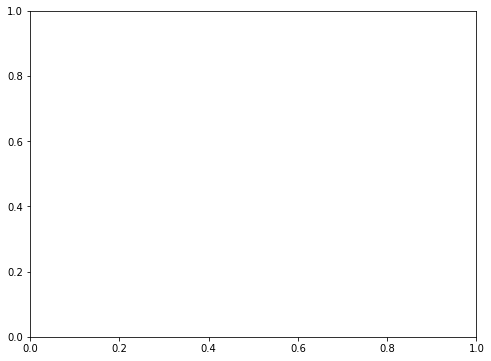

In [40]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1], c=data,cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

# applying algorithms

## KMeans

In [75]:
dfk = data.copy()
dfk.shape

(8636, 17)

In [76]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=7, random_state=33)
dfk['cluster'] = kmeans.fit_predict(dfk[features])
dfk.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,-0.744625,-0.370047,-0.429184,-0.359160,-0.354826,-0.468655,-0.820769,-0.686280,-0.717179,-0.681953,-0.479437,-0.517623,-0.962575,-0.543942,-0.305508,-0.537727,0.355181,3
1,0.764152,0.067679,-0.473208,-0.359160,-0.458839,2.568556,-1.236139,-0.686280,-0.926522,0.557022,0.099258,-0.597054,0.677204,0.796852,0.087689,0.212380,0.355181,4
2,0.426602,0.505405,-0.116413,0.099909,-0.458839,-0.468655,1.256077,2.646651,-0.926522,-0.681953,-0.479437,-0.120467,0.813852,-0.399503,-0.099906,-0.537727,0.355181,0
4,-0.373910,0.505405,-0.465825,-0.349660,-0.458839,-0.468655,-1.028455,-0.408536,-0.926522,-0.681953,-0.479437,-0.557339,-0.907916,-0.380165,-0.261131,-0.537727,0.355181,3
5,0.099551,0.505405,0.142062,-0.359160,0.994815,-0.468655,0.425339,-0.686280,0.538882,-0.681953,-0.479437,-0.279329,-0.743938,-0.132119,0.650363,-0.537727,0.355181,1


<AxesSubplot: xlabel='BALANCE', ylabel='BALANCE_FREQUENCY'>

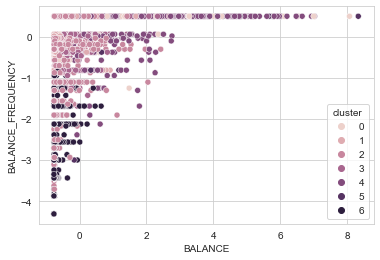

In [77]:
sns.scatterplot(data=dfk, x='BALANCE', y='BALANCE_FREQUENCY', hue='cluster')

In [44]:
kmeans.inertia_

108086.64609719646

In [67]:
# Elbow Method
inertia = []
n_clusters = []
for k in range(2, 20):
    model = KMeans(n_clusters=k)
    model.fit(dfk[features])
    inertia.append(model.inertia_)
    n_clusters.append(k)  

<AxesSubplot: >

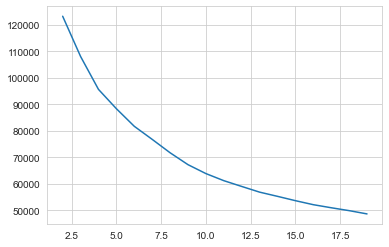

In [68]:
sns.lineplot(x=n_clusters, y=inertia)

In [46]:
# validate
from sklearn.metrics import silhouette_score, silhouette_samples
sscore = silhouette_score(dfk[features], dfk.cluster)
sscore

0.24772149965735396

In [48]:
ssamples = silhouette_samples(dfk[features], dfk.cluster)
ssamples

array([0.4584373 , 0.10367415, 0.19630187, ..., 0.28481703, 0.21343992,
       0.18269496])

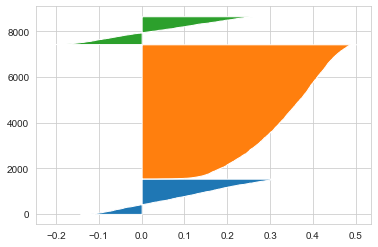

In [49]:
# Visualization
sns.set_style('whitegrid')
ylow = 10
for c in set(kmeans.labels_):
    csample = ssamples[dfk.cluster==c]
    csample.sort()
    yup = ylow+csample.shape[0]
    plt.fill_betweenx(np.arange(ylow, yup), 0, csample)
    ylow = yup + 10
plt.show()